# Temprature forcasting 

Before working on this project please read these instructions fully.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this project. Note: The data for this project comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the project datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this project, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [110]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

data=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv') 
data.head()
data.shape


(165085, 4)

preprocessing data

In [121]:
#The IDs won't be used
data = data.drop("ID", axis=1)

#A date_index object that will be used for several tasks
date_index = pd.DatetimeIndex(data['Date'])

#Removing the leap days: Feb 29
data = data[~((date_index.is_leap_year) & (date_index.month == 2) & (date_index.day == 29))]

#How many records?
len(data)

#Refreshing the date_index
date_index = pd.DatetimeIndex(data['Date'])

#The main index will be the Monty-Day combination
data["Month"] = date_index.month
data["Day"] = date_index.day

data_2015 = data[date_index >= "2015-01-01"]
data = data[date_index < "2015-01-01"]

#The maximum temperatures records
data_max = data[data["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_max = data_max / 10
data_max.head()

#The minimum temperatures records
data_min = data[data["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_min = data_min / 10
data_min.head()

Month  Day
1      1     -16.0
       2     -26.7
       3     -26.7
       4     -26.1
       5     -15.0
Name: Data_Value, dtype: float64

In [125]:
#The 2015 maximum temperatures records
data_2015_max = data_2015[data_2015["Element"]=="TMAX"].groupby(["Month", "Day"])["Data_Value"].max()
data_2015_max = data_2015_max / 10
data_2015_max.head()
#The 2015 minimum temperatures records
data_2015_min = data_2015[data_2015["Element"]=="TMIN"].groupby(["Month", "Day"])["Data_Value"].min()
data_2015_min = data_2015_min / 10
data_2015_min.head()

#When where the records broken?
max_rec_broken = (data_2015_max > data_max).as_matrix()
print(np.sum(max_rec_broken))
min_rec_broken = (data_2015_min < data_min).as_matrix()
print(np.sum(min_rec_broken))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)
#import matplotlib
#mpl.style.use('ggplot')


37
32


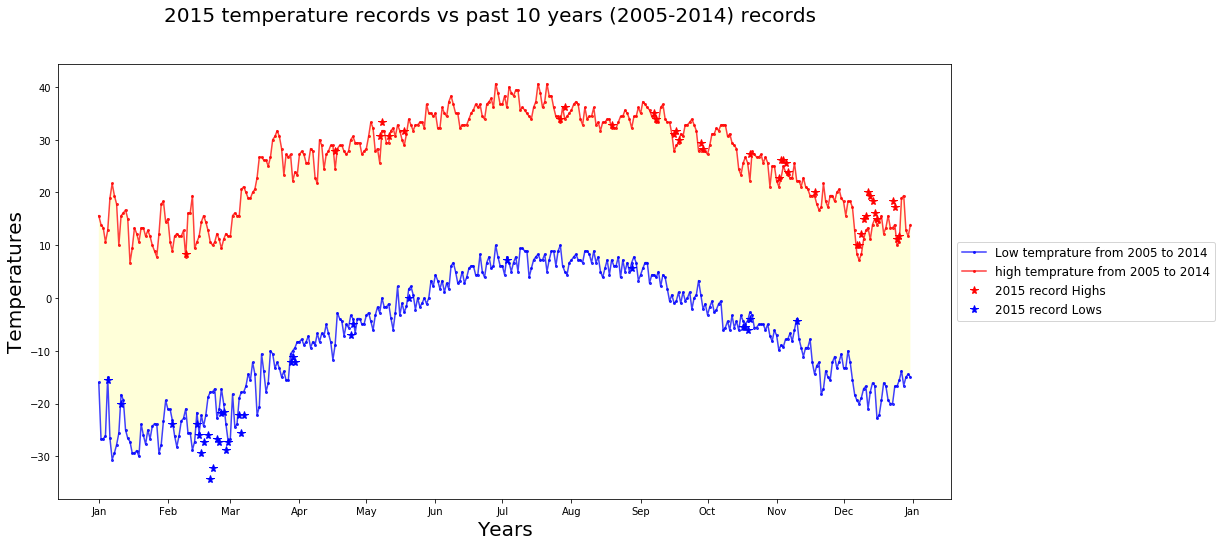

In [132]:
observation_axis = np.arange('2015-01-01', '2016-01-01', dtype='datetime64[D]')
observation_axis = np.array(list(map(pd.to_datetime, observation_axis)))

plt.suptitle("2015 temperature records vs past 10 years (2005-2014) records", fontsize=20)


#Past record temperatures
plt.plot(observation_axis, data_min.as_matrix(), '-o', color='blue', ms=2, alpha=0.75) 
plt.plot(observation_axis, data_max.as_matrix(), '-o', color='red', ms=2, alpha=0.75) 

#2015 record temperatures
plt.plot(observation_axis[max_rec_broken], data_2015_max[max_rec_broken].as_matrix(), 'r*',
         observation_axis[min_rec_broken], data_2015_min[min_rec_broken].as_matrix(), 'b*', 
         ms=8, alpha=1.0)

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(['Low temprature from 2005 to 2014', 'high temprature from 2005 to 2014', "2015 record Highs", "2015 record Lows"], loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size':12})

plt.gca().fill_between(observation_axis, data_min, data_max, facecolor='yellow', alpha=0.15)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperatures', fontsize=20)

this link is to the data file on your online jupyter

If you run the following code in one of the cells of Assignment 2 notebook on the online platform it will generate a link from which you can download the file

In [35]:
file ='data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
!cp "$file" .
from IPython.display import HTML
link = '<a href="{0}" download>Click here to download {0}</a>'
HTML(link.format(file.split('/')[-1]))